# Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

# HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

# Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

# Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv ('C:/Users/Admin/Desktop/Data_science_ project/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#  
Given that the target variable is "Attrition"  (whether an employee has left or not), this is a binary classification problem

In [3]:
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
367,50,No,Travel_Rarely,1046,Research & Development,10,3,Technical Degree,1,491,...,4,80,0,20,2,3,4,3,1,3
230,52,No,Travel_Rarely,1323,Research & Development,2,3,Life Sciences,1,316,...,2,80,0,6,3,2,2,2,2,2
1113,32,No,Non-Travel,1200,Research & Development,1,4,Technical Degree,1,1574,...,2,80,1,9,3,2,6,5,1,2
562,33,Yes,Travel_Rarely,527,Research & Development,1,4,Other,1,780,...,3,80,0,10,2,2,10,9,7,8
548,43,No,Travel_Frequently,775,Sales,15,3,Life Sciences,1,754,...,3,80,1,7,5,3,2,2,2,2
657,29,No,Travel_Rarely,1086,Research & Development,7,1,Medical,1,912,...,3,80,3,8,5,3,4,3,0,3
172,36,No,Travel_Frequently,1480,Research & Development,3,2,Medical,1,238,...,3,80,0,13,3,2,8,7,7,2
526,39,No,Travel_Rarely,408,Research & Development,2,4,Technical Degree,1,721,...,1,80,0,20,4,3,20,7,11,10
356,42,No,Travel_Rarely,1332,Research & Development,2,4,Other,1,477,...,2,80,0,14,6,3,1,0,0,0
1174,25,No,Travel_Frequently,772,Research & Development,2,1,Life Sciences,1,1653,...,3,80,2,7,6,3,7,7,0,7


#  This is the sample of the dataset 

In [4]:
df.duplicated().sum()

0

#  
there is no duplicate value present in the dataset

In [5]:
df.shape

(1470, 35)

# 
There is 1470 rows and 35 columns present in the dataset

In [6]:
for i in df.columns:
    print(df[i].value_counts())

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
No     1233
Yes     237
Name: Attrition, dtype: int64
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     2

In [7]:
df['Over18'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1465    Y
1466    Y
1467    Y
1468    Y
1469    Y
Name: Over18, Length: 1470, dtype: object>

In [8]:
df['Over18'].nunique()

1

#  Over18 column only single  value so we drop this column

In [9]:
df['EmployeeNumber'].nunique()

1470

#  The total rows of the dataset is 1470 and the same no of employee number so we cant analyse them so better we drop this column

In [10]:
df['EmployeeCount'].nunique()

1

#  employee count column each column mention only 1 number so its better we drop this column

In [11]:
df.drop(columns=['EmployeeNumber','EmployeeCount','Over18'],axis=1,inplace=True)

In [12]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# There is data imbalance but we will solve this promblem when we build a model 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [14]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# 
There is no null value present in the dataset

In [15]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# 
as per the statistics information count is 1470 it means there is no null value present in the dataset

Age: The average age of employees is approximately 36.92 years, with a standard deviation of 9.14. The minimum age is 18, and the maximum age is 60.

DailyRate: The average daily rate of employees is approximately $802.49,  with a standard deviation of $403.51.

DistanceFromHome: The average distance from home for employees is approximately 9.19 kms, with a standard deviation of 8.11 kms.

Education: The average education level of employees is approximately 2.91, which corresponds to some college education.

EnvironmentSatisfaction: The average level of environment satisfaction for employees is approximately 2.72, on a scale of 1 to 4.

HourlyRate: The average hourly rate of employees is approximately $65.89, with a standard deviation of $20.33.

JobInvolvement: The average level of job involvement for employees is approximately 2.73, on a scale of 1 to 4.

JobLevel: The average job level of employees is approximately 2.06, indicating most employees are at a mid-level position.

JobSatisfaction: The average level of job satisfaction for employees is approximately 2.73, on a scale of 1 to 4.

RelationshipSatisfaction: The average level of relationship satisfaction for employees is approximately 2.71, on a scale of 1 to 4.

TotalWorkingYears: The average total number of working years for employees is approximately 11.28, with a standard deviation of 7.78.

TrainingTimesLastYear: On average, employees have received training approximately 2.80 times in the last year.

WorkLifeBalance: The average work-life balance rating for employees is approximately 2.76, on a scale of 1 to 4.

YearsAtCompany: The average number of years employees have spent at the company is approximately 7.01, with a standard deviation of 6.13.

YearsInCurrentRole: The average number of years employees have spent in their current role is approximately 4.23, with a standard deviation of 3.62.

YearsSinceLastPromotion: The average number of years since the last promotion for employees is approximately 2.19, with a standard deviation of 3.22.

YearsWithCurrManager: The average number of years employees have spent with their current manager is approximately 4.12, with a standard deviation of 3.57

#  EDA

In [16]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


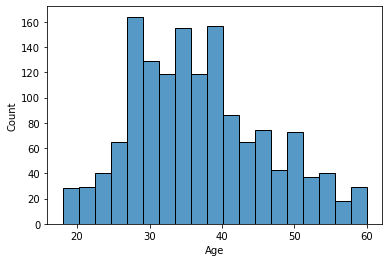

In [17]:
sns.histplot(data=df,x='Age')
plt.show()

# 
as per the information the maximum age range is 28 to 40 age 

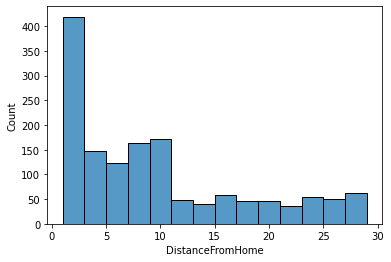

In [18]:
sns.histplot(data=df,x='DistanceFromHome')
plt.show()

#  
as per the information most of the employeers near tp office and the few eployeers is 28 kms far from the company

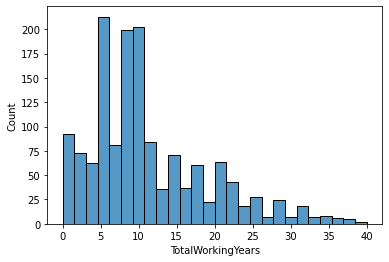

In [19]:
sns.histplot(data=df,x='TotalWorkingYears')
plt.show()

# 
As per the information there is maximum no is 5 to 10 years of experience 

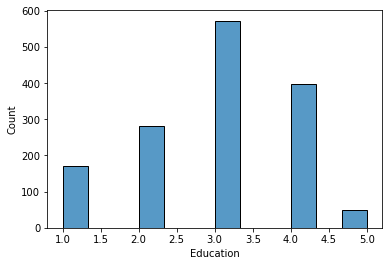

In [20]:
sns.histplot(data=df,x='Education')
plt.show()

#  
As per the information there is maximum value is 3 

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


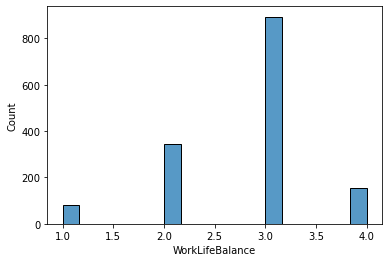

In [21]:
sns.histplot(data=df,x='WorkLifeBalance')
print(df['WorkLifeBalance'].value_counts())
plt.show()

# 
there is WorkLifeBalance is most of the data is 3 

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: YearsAtCompany, dtype: int64


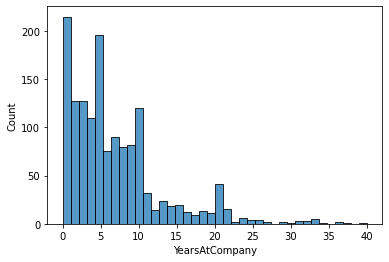

In [22]:
sns.histplot(data=df,x='YearsAtCompany')
print(df['YearsAtCompany'].value_counts())
plt.show()

#  as per the information there is most of the employees 0 to years of experience 

2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64


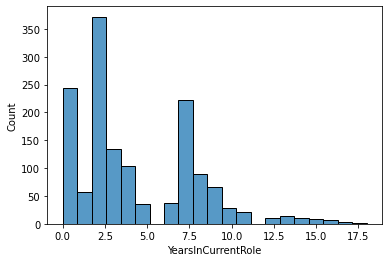

In [23]:
sns.histplot(data=df,x='YearsInCurrentRole')
print(df['YearsInCurrentRole'].value_counts())
plt.show()

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64


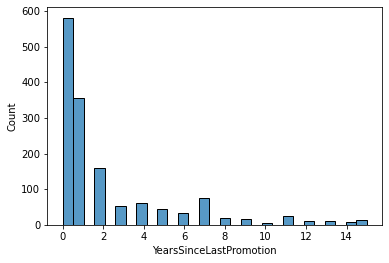

In [24]:
sns.histplot(data=df,x='YearsSinceLastPromotion')
print(df['YearsSinceLastPromotion'].value_counts())
plt.show()

#  In this dataset there is most of  no increments in last years 

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
15      5
14      5
16      2
Name: YearsWithCurrManager, dtype: int64


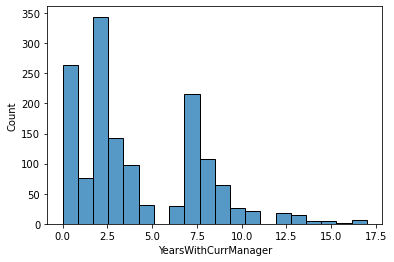

In [25]:
sns.histplot(data=df,x='YearsWithCurrManager')
print(df['YearsWithCurrManager'].value_counts())
plt.show()

#  in this dataset manager experience years most of 2.5 years

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


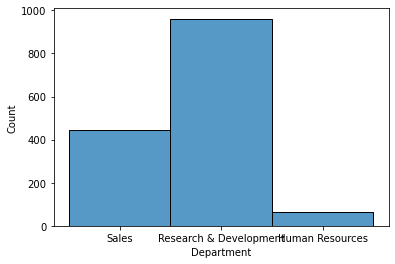

In [26]:
sns.histplot(data=df,x='Department')
print(df['Department'].value_counts())
plt.show()

# In this dataset there is 3 types of departments and most of data is research and development department 

80    1470
Name: StandardHours, dtype: int64


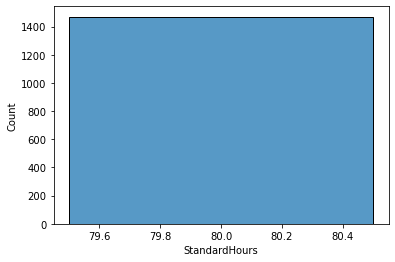

In [27]:
sns.histplot(data=df,x='StandardHours')
print(df['StandardHours'].value_counts())
plt.show()


#   There is standard hours  in every department so we drop this column cause if the same standard hours in every department so we cant analyse this column

In [28]:
df.drop(columns='StandardHours',inplace=True,axis=1)

In [29]:
attrition_status =pd.crosstab(df['Attrition'],df['Department'],margins=True)
attrition_status


Department,Human Resources,Research & Development,Sales,All
Attrition,,,,
No,51,828,354,1233
Yes,12,133,92,237
All,63,961,446,1470


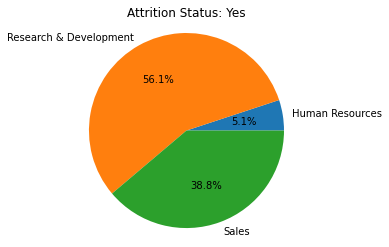

In [30]:
attrition_status = {
    'Department': ['Human Resources', 'Research & Development', 'Sales'],
    'No': [51, 828, 354],
    'Yes': [12, 133, 92]
}

yes_counts = attrition_status['Yes']
departments = attrition_status['Department']

plt.pie(yes_counts, labels=departments, autopct='%1.1f%%')
plt.title('Attrition Status: Yes')
plt.axis('equal')  

plt.show()

#  As per the information the high chanses attrition in research and development department and sales

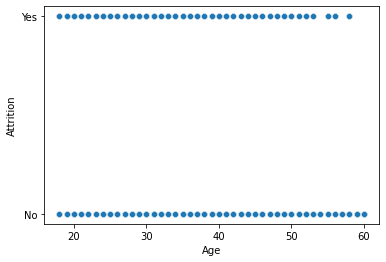

In [31]:
sns.scatterplot(data=df,x = 'Age', y= 'Attrition')
plt.show()

#  There is not a specified age to Attrition yes status

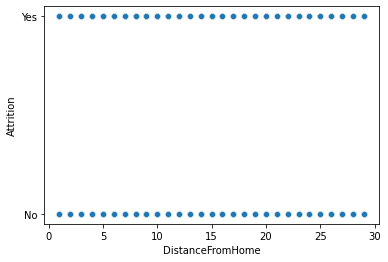

In [32]:
sns.scatterplot(data=df,x = 'DistanceFromHome', y= 'Attrition')
plt.show()

#  There is no effect for distancefromhome for  attrition status

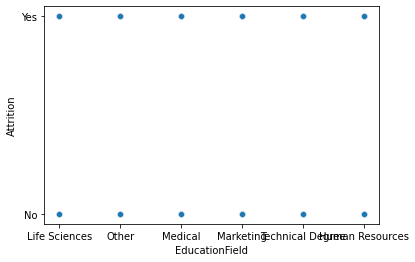

In [33]:
sns.scatterplot(data=df,x = 'EducationField', y= 'Attrition')
plt.show()

#  There is equal education field for Attrition status

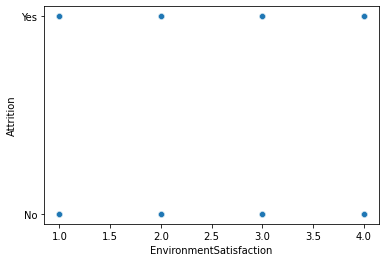

In [34]:
sns.scatterplot(data=df,x = 'EnvironmentSatisfaction', y= 'Attrition')
plt.show()

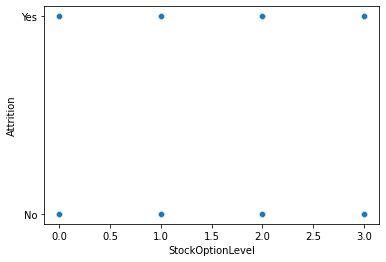

In [35]:
sns.scatterplot(data=df,x = 'StockOptionLevel', y= 'Attrition')
plt.show()

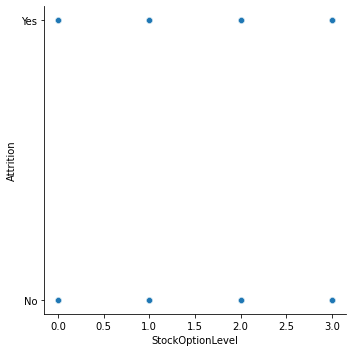

In [36]:
sns.relplot(data=df, x="StockOptionLevel", y="Attrition")
plt.show()

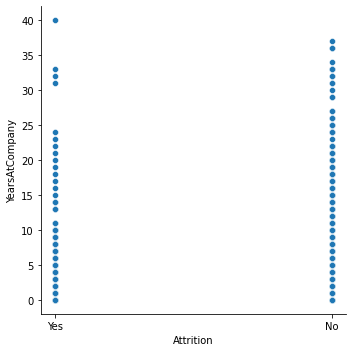

In [37]:
sns.relplot(data=df, x="Attrition", y="YearsAtCompany")
plt.show()

# 
The 25 to 30 years at company there is no chances to attrition

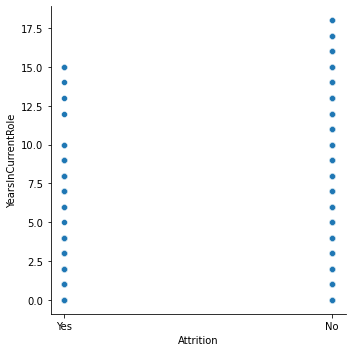

In [38]:
sns.relplot(data=df, x="Attrition", y="YearsInCurrentRole")
plt.show()

#  More than 15 years there is no chances to attrition

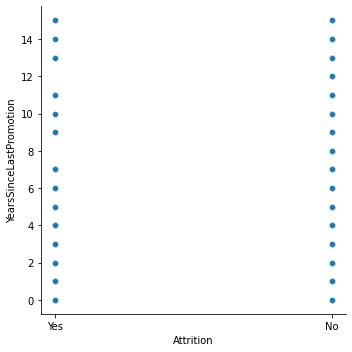

In [39]:
sns.relplot(data=df, x="Attrition", y="YearsSinceLastPromotion")
plt.show()

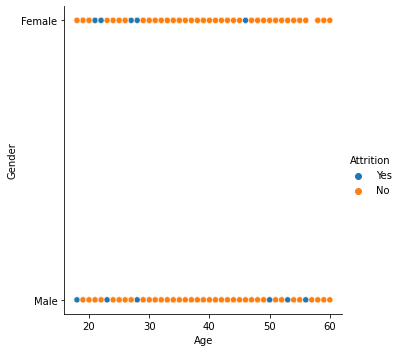

In [40]:
sns.relplot(data=df, x="Age", y="Gender",hue ='Attrition')
plt.show()

#  AS per the information the age of 20 to 30 male or female the attrition status high 

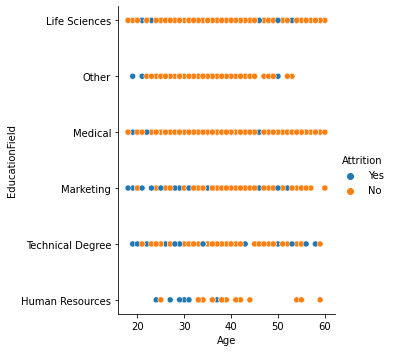

In [41]:
sns.relplot(data=df, x="Age", y="EducationField",hue ='Attrition')  
plt.show()

#  As per the information the marketing education field high attrition  chances

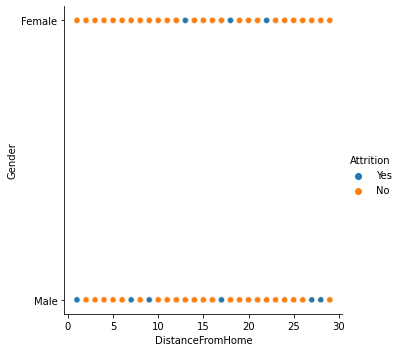

In [42]:
sns.relplot(data=df, x="DistanceFromHome", y="Gender",hue ='Attrition')  
plt.show()

#  As per the information the distancefromhome is above 25 there is Male attrition yes status high

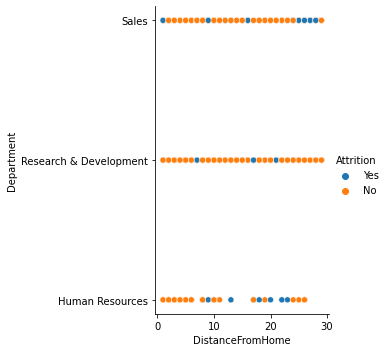

In [43]:
sns.relplot(data=df, x="DistanceFromHome", y="Department",hue ='Attrition')  
plt.show()

# As per the information distancefromhome in sales dept high attrition yes status   distancefromhome 

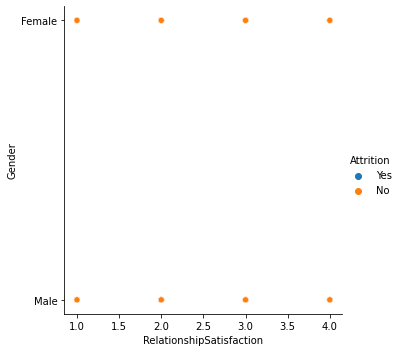

In [44]:
sns.relplot(data=df, x="RelationshipSatisfaction", y="Gender",hue ='Attrition')  
plt.show()

#  There is noeffect for attrition of  relationshipsatisfaction 

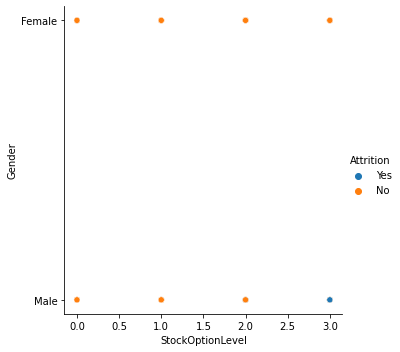

In [45]:
sns.relplot(data=df, x="StockOptionLevel", y="Gender",hue ='Attrition')  
plt.show()

#  the stockoption level has more than 3 then there is high chances to attrition of male employees

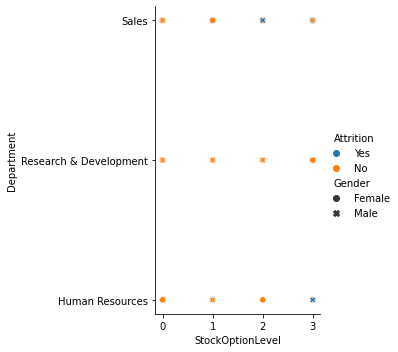

In [46]:
sns.relplot(data=df, x="StockOptionLevel", y="Department",hue ='Attrition',style ='Gender')  
plt.show()

#  The sale and hr dept male employees high chances to resign this organisation

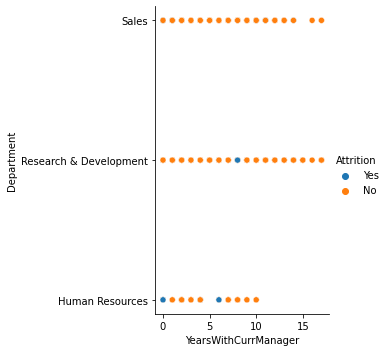

In [47]:
sns.relplot(data=df, x="YearsWithCurrManager", y="Department",hue ='Attrition')  
plt.show()

#  
as per the information in sales dept noone left organisation

less than 6 years there is a chances to hr dept 

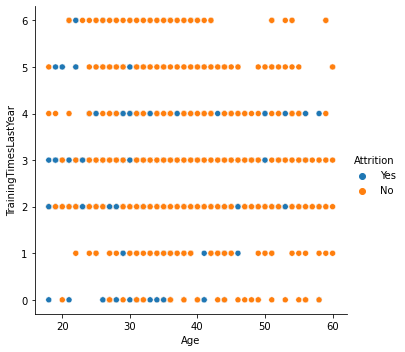

In [48]:
sns.relplot(data=df, x="Age", y="TrainingTimesLastYear",hue ='Attrition')   
plt.show()

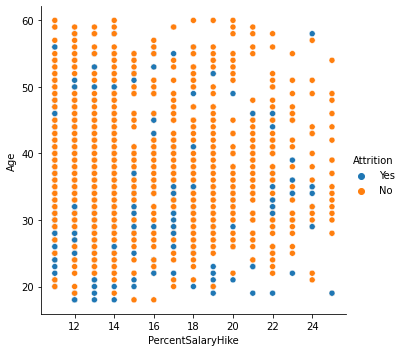

In [49]:
sns.relplot(data=df, x="PercentSalaryHike", y="Age",hue ='Attrition')   
plt.show()

#  As per the information the below 35 age there is high attrition to chances 

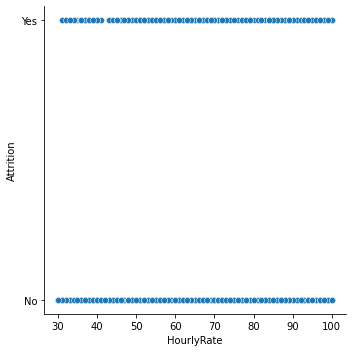

In [50]:
sns.relplot(data=df, x="HourlyRate", y="Attrition")   
plt.show()

#   As per the information there is no contribute hourly rate in attrition status
# so we drop this column

In [51]:
df.drop(columns='HourlyRate',axis=1,inplace=True)

In [52]:
catgorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catgorical_col.append(i)
        
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] !='object':
        numerical_col.append(i)

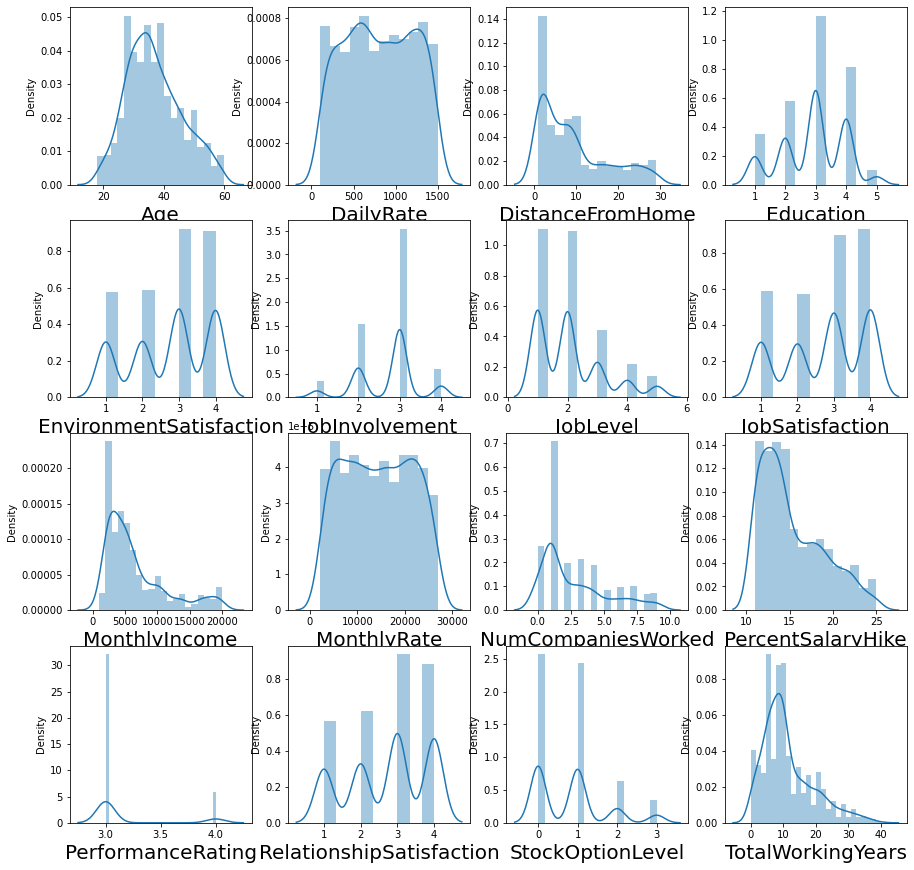

In [53]:
 plt.figure(figsize=(15,15))
plotnumber =1
for column in numerical_col:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

# 
As per the visiualisation

Age ,DailyRate, monthly rate is looks like a normally distrubuted

Education,EnvironmentSatisfaction,Jobinvolment,JobLevel,JobSatisfaction,

RelationshipSatisfaction, StockOptionLevel this columns are classification column 

DistanceFromhome, Monthlyincome, percentsalaryhike and Totalworkingyears are left skewness

#  Let's check outliers

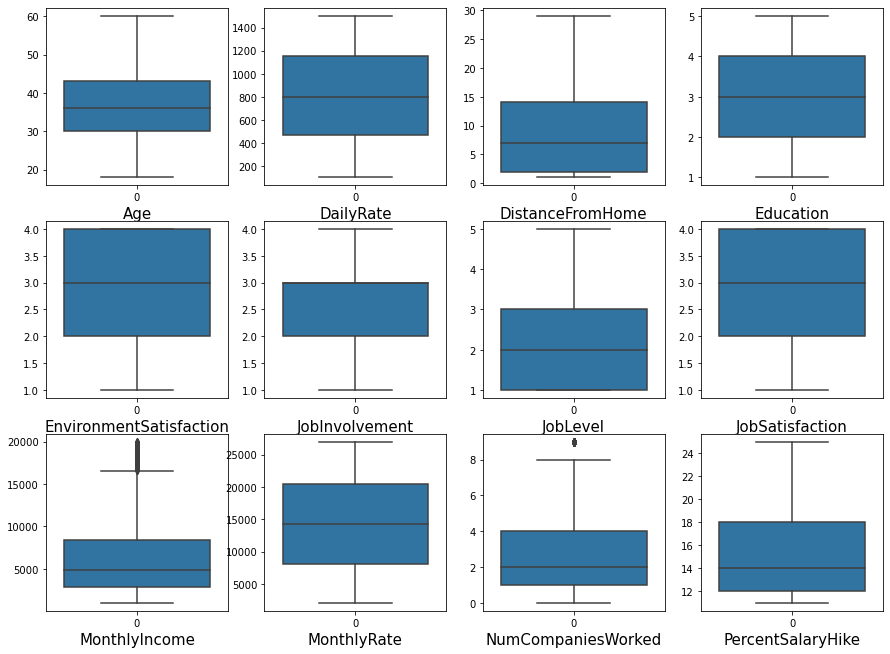

In [54]:
plt.figure(figsize=(15,15))
i=1
for column in numerical_col:
    if i<=12:
        
        
    
        plt.subplot(4,4,i)
    
        ax=sns.boxplot(data=df[column])
    
        plt.xlabel (column,fontsize=15)
        
    i+=1
    
plt.show()
    
                
                


#  As per the visiualisation we found outliers MonthlyIncome and Numcomapniesworked column

In [55]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)

iqr=q3-q1

In [56]:
MonthlyIncome_high=q3.MonthlyIncome+(1.5*iqr.MonthlyIncome)
MonthlyIncome_high

16581.0

In [57]:
index=np.where(df['MonthlyIncome']>MonthlyIncome_high)
index

(array([  25,   29,   45,   62,  105,  106,  112,  119,  123,  147,  165,
         186,  187,  190,  194,  231,  233,  237,  244,  257,  263,  270,
         279,  280,  290,  314,  326,  329,  379,  392,  400,  411,  417,
         425,  429,  445,  466,  473,  477,  489,  497,  535,  538,  561,
         568,  584,  588,  592,  595,  609,  653,  699,  710,  714,  716,
         741,  746,  749,  755,  766,  770,  774,  799,  804,  810,  814,
         851,  858,  861,  867,  869,  894,  898,  899,  904,  907,  913,
         916,  918,  922,  936,  937,  945,  954,  955,  956,  999, 1008,
        1009, 1024, 1043, 1055, 1080, 1116, 1126, 1129, 1135, 1140, 1154,
        1184, 1185, 1225, 1242, 1264, 1277, 1330, 1331, 1348, 1351, 1374,
        1377, 1401, 1437, 1443], dtype=int64),)

In [58]:
df1=df.drop(df.index[index])
print(df1.shape)
print(df.shape)

(1356, 30)
(1470, 30)


#  percentage of data loss

In [59]:
data_loss= (1470-1356)/1470*100
data_loss

7.755102040816326

#  We try to check z score to check outliers

In [60]:
x=df.drop(columns='Attrition')
y=df['Attrition']

In [61]:
from scipy.stats import zscore
features=df[['MonthlyIncome','NumCompaniesWorked']]
z=np.abs(zscore(features))
z.shape

(1470, 2)

#  Using z score techniques we are not founding any outliers

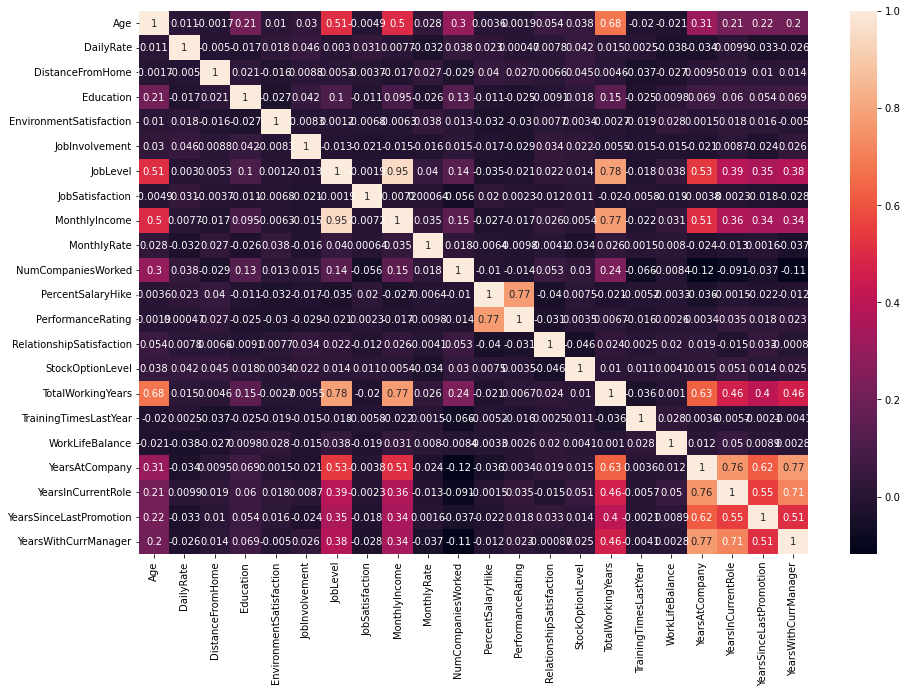

In [62]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

#  we have not found any co-relation with each other

In [63]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

#  
we found skewness in DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,
StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,
YearsSinceLastPromotion,YearsWithCurrManager 

#  Reduced skewness

In [64]:
df['DistanceFromHome'] =np.cbrt(df['DistanceFromHome'])
df['JobLevel'] =np.cbrt(df['JobLevel'])
df['MonthlyIncome'] =np.cbrt(df['MonthlyIncome'])
df['NumCompaniesWorked'] =np.cbrt(df['NumCompaniesWorked'])
df['PercentSalaryHike'] =np.cbrt(df['PercentSalaryHike'])
df['PerformanceRating'] =np.cbrt(df['PerformanceRating'])
df['StockOptionLevel'] =np.cbrt(df['StockOptionLevel'])
df['TotalWorkingYears'] =np.cbrt(df['TotalWorkingYears'])
df['TrainingTimesLastYear'] =np.cbrt(df['TrainingTimesLastYear'])
df['TrainingTimesLastYear'] =np.cbrt(df['TrainingTimesLastYear'])
df['YearsAtCompany'] =np.cbrt(df['YearsAtCompany'])
df['YearsInCurrentRole'] =np.cbrt(df['YearsInCurrentRole'])
df['YearsSinceLastPromotion'] =np.cbrt(df['YearsSinceLastPromotion'])
df['YearsWithCurrManager'] =np.cbrt(df['YearsWithCurrManager'])

In [65]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.186998
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
JobInvolvement             -0.498419
JobLevel                    0.460775
JobSatisfaction            -0.329672
MonthlyIncome               0.677032
MonthlyRate                 0.018578
NumCompaniesWorked         -0.699002
PercentSalaryHike           0.601248
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel           -0.139490
TotalWorkingYears          -0.395296
TrainingTimesLastYear      -4.523787
WorkLifeBalance            -0.552480
YearsAtCompany             -0.367351
YearsInCurrentRole         -0.866884
YearsSinceLastPromotion     0.198634
YearsWithCurrManager       -0.820395
dtype: float64

# Encoding process

In [66]:
from sklearn.preprocessing import LabelEncoder
lm=LabelEncoder()
for i in catgorical_col:
    df[i] = lm.fit_transform(df[i])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1.000000,2,1,2,0,...,1.442250,1,0.0,2.000000,0.000000,1,1.817121,1.587401,0.000000,1.709976
1,49,0,1,279,1,2.000000,1,1,3,1,...,1.587401,4,1.0,2.154435,1.129831,3,2.154435,1.912931,1.000000,1.912931
2,37,1,2,1373,1,1.259921,2,4,4,1,...,1.442250,2,0.0,1.912931,1.129831,3,0.000000,0.000000,0.000000,0.000000
3,33,0,1,1392,1,1.442250,4,1,4,0,...,1.442250,3,0.0,2.000000,1.129831,3,2.000000,1.912931,1.442250,0.000000
4,27,0,2,591,1,1.259921,1,3,1,1,...,1.442250,4,1.0,1.817121,1.129831,3,1.259921,1.259921,1.259921,1.259921


In [67]:
x=df.drop(columns='Attrition')
y=df['Attrition']

In [68]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [69]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [70]:
y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

#  We fix data imbalance

In [71]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.659367,0.758157,0.831914,1.604652,-1.586041,-0.774095,-0.913395,-0.426245,-1.033824,0.663096,...,-0.464119,-1.445053,-1.000047,0.012975,-4.910122,-2.090026,0.319452,0.514894,-1.131414,0.724651
1,1.563642,-0.784429,-1.260784,-0.355265,0.107861,-1.808178,-0.913395,0.507255,0.967283,-0.699566,...,2.552911,1.412606,0.898773,0.292118,0.306439,0.574919,0.899569,0.993727,0.265514,1.013387
2,0.207230,0.758157,1.521004,-0.355265,-1.145760,-0.774095,1.488773,1.440754,0.967283,-0.699566,...,-0.464119,-0.492500,-1.000047,-0.144402,0.306439,0.574919,-2.805656,-1.820066,-1.131414,-1.708054
3,-0.244908,-0.784429,1.569316,-0.355265,-0.836913,1.294072,-0.913395,1.440754,-1.033824,0.663096,...,-0.464119,0.460053,-1.000047,0.012975,0.306439,0.574919,0.633970,0.993727,0.883304,-1.708054
4,-0.923114,0.758157,-0.467440,-0.355265,-1.145760,-1.808178,0.688050,-1.359745,0.967283,0.663096,...,-0.464119,1.412606,0.898773,-0.317581,0.306439,0.574919,-0.638827,0.033193,0.628605,0.084379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,1.789711,0.758157,-1.487090,-2.315182,1.360336,0.259989,-0.112673,0.507255,-1.033824,-0.699566,...,-0.464119,1.412606,1.076882,1.877012,0.306439,-0.757553,2.288113,1.069892,1.956301,0.328781
2462,-1.036149,0.758157,-1.085333,-0.355265,0.098879,-0.774095,-0.112673,-0.426245,0.967283,0.663096,...,-0.464119,-0.492500,-1.000047,-1.088055,0.363806,-0.757553,-0.413640,-1.101804,-0.207445,-0.744716
2463,-0.470977,-0.784429,-1.003964,-0.355265,0.688531,-1.808178,0.688050,-0.426245,-1.033824,0.663096,...,-0.464119,-1.445053,-0.370004,0.391547,-0.054908,0.574919,0.181048,0.252699,0.837066,0.296680
2464,-0.923114,0.758157,1.632886,-0.355265,-1.079772,-1.808178,-0.112673,-0.426245,-1.033824,0.663096,...,-0.464119,-0.492500,0.826923,-0.433693,0.109048,0.574919,0.003422,0.358379,-1.001053,0.124219


In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif ['features'] =x.columns 
vif

,vif,features
0,2.089894,Age
1,1.044444,BusinessTravel
2,1.055285,DailyRate
3,1.897362,Department
4,1.034765,DistanceFromHome
5,1.080819,Education
6,1.043334,EducationField
7,1.081891,EnvironmentSatisfaction
8,1.043451,Gender
9,1.106843,JobInvolvement


# we found MonthlyIncome vif value is greater than 5 we drop this column

In [73]:
x.drop(columns='MonthlyIncome',axis=1,inplace=True)

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif ['features'] =x.columns 
vif

,vif,features
0,2.089876,Age
1,1.041441,BusinessTravel
2,1.055250,DailyRate
3,1.896578,Department
4,1.027512,DistanceFromHome
5,1.080805,Education
6,1.043134,EducationField
7,1.079078,EnvironmentSatisfaction
8,1.041444,Gender
9,1.105884,JobInvolvement


# YearsAtCompany vif value is greater than 5 we drop this columns

In [75]:
x.drop(columns='YearsAtCompany',axis=1,inplace=True)

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif ['features'] =x.columns 
vif

,vif,features
0,2.088745,Age
1,1.039977,BusinessTravel
2,1.052204,DailyRate
3,1.895512,Department
4,1.025747,DistanceFromHome
5,1.080383,Education
6,1.042134,EducationField
7,1.078900,EnvironmentSatisfaction
8,1.039994,Gender
9,1.104409,JobInvolvement


# 
Preprocessing done now we can build a model

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRs = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    rnd = RandomForestClassifier()
    rnd.fit(x_train, y_train)
    y_pred = rnd.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i

print('Best accuracy is', maxAccu, 'at random_state', maxRs)


Best accuracy is 0.9364864864864865 at random_state 45


In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=maxRs)

In [79]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report ,confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


In [80]:
LR=LogisticRegression()
LR.fit(x_train, y_train)
predLR= LR.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predLR)))
print('\n')
print(confusion_matrix(y_test, predLR))

Accuracy score 0.8297297297297297


[[308  66]
 [ 60 306]]


In [81]:
Rnd= RandomForestClassifier()
Rnd.fit(x_train, y_train)
predRnd= Rnd.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predRnd)))
print('\n')
print(confusion_matrix(y_test, predRnd))

Accuracy score 0.9297297297297298


[[360  14]
 [ 38 328]]


In [82]:
Etr= ExtraTreesClassifier()
Etr.fit(x_train, y_train)
predEtr= Etr.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predEtr)))
print('\n')
print(confusion_matrix(y_test, predEtr))

Accuracy score 0.9256756756756757


[[349  25]
 [ 30 336]]


In [83]:
svc=SVC()
svc.fit(x_train, y_train)
predsvc=svc.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predsvc)))
print('\n')

print(confusion_matrix(y_test, predsvc))

Accuracy score 0.8945945945945946


[[340  34]
 [ 44 322]]


In [84]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train, y_train)
predgbc =gbc.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predgbc)))
print('\n')

print(confusion_matrix(y_test, predgbc))

Accuracy score 0.9324324324324325


[[358  16]
 [ 34 332]]


In [85]:
adaboost= AdaBoostClassifier()
adaboost.fit(x_train, y_train)
predadaboost =adaboost.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predadaboost)))
print('\n')

print(confusion_matrix(y_test, predadaboost))

Accuracy score 0.8770270270270271


[[326  48]
 [ 43 323]]


In [86]:
bagging=BaggingClassifier()
bagging.fit(x_train, y_train)
predbagging =bagging.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predbagging)))
print('\n')

print(confusion_matrix(y_test, predbagging))

Accuracy score 0.9108108108108108


[[355  19]
 [ 47 319]]


#  Cross Validation Score

In [87]:
print('LogisticRegression ')
print('\n')
score=cross_val_score(LR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predLR)- score.mean())

LogisticRegression 


[0.66396761 0.85192698 0.8336714  0.8336714  0.83975659]
0.8045987961008778
Difference between Accuracy score  and cross validation score is -  0.02513093362885188


In [88]:
print('ExtraTreesClassifier ')
print('\n')
score=cross_val_score(Rnd, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predRnd)- score.mean())

ExtraTreesClassifier 


[0.63562753 0.98174442 0.95943205 0.96754564 0.95740365]
0.9003506582026919
Difference between Accuracy score  and cross validation score is -  0.029379071527037892


In [89]:
print('SVC ')
print('\n')
score=cross_val_score(svc, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predsvc)- score.mean())

SVC 


[0.67408907 0.94320487 0.9188641  0.90872211 0.90669371]
0.8703147711688333
Difference between Accuracy score  and cross validation score is -  0.024279823425761293


In [90]:
print('GradientBoostingClassifier ')
print('\n')
score=cross_val_score(gbc, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predgbc)- score.mean())

GradientBoostingClassifier 


[0.55263158 0.97160243 0.95334686 0.95740365 0.95740365]
0.8784776342478915
Difference between Accuracy score  and cross validation score is -  0.053954798184540964


In [91]:
print('AdaBoostClassifier ')
print('\n')
score=cross_val_score(adaboost, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predadaboost)- score.mean())

AdaBoostClassifier 


[0.5708502  0.92292089 0.92292089 0.93306288 0.93509128]
0.8569692291268037
Difference between Accuracy score  and cross validation score is -  0.02005779790022333


In [92]:
print('BaggingClassifier ')
print('\n')
score=cross_val_score(bagging, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predbagging)- score.mean())

BaggingClassifier 


[0.61336032 0.95943205 0.93306288 0.93306288 0.94523327]
0.87683027978747
Difference between Accuracy score  and cross validation score is -  0.033980531023340865


# ExtraTreesClassifier will gives the 92 accuracy and 

# cross validation score is 2 but we try to use hyperpyrameter tunning to increase accuracy

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
param_grid = {
    'criterion': ['mse', 'entropy'],
    'random_state': [10, 100, 850],
    'max_depth': [1, 15, 30],
    'n_estimators': [50, 100, 200, 300]
}

gscv = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=5)
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['mse', 'entropy'],
                         'max_depth': [1, 15, 30],
                         'n_estimators': [50, 100, 200, 300],
                         'random_state': [10, 100, 850]})

In [95]:
gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'n_estimators': 300,
 'random_state': 10}

In [100]:
Final_model= ExtraTreesClassifier(criterion= 'entropy',max_depth= 30,n_estimators = 300  ,random_state =10)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc= accuracy_score(y_test, pred)
print(acc*100)
print('\n')
print(confusion_matrix(y_test, pred))

93.51351351351352


[[357  17]
 [ 31 335]]


#  Using hyperpyrameter tunning we increase 1 percent accuracy

AUC score: 0.934923000496771


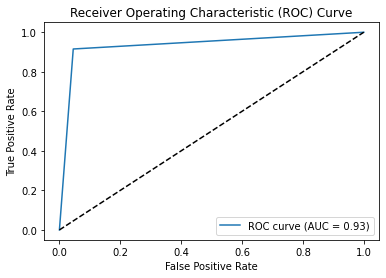

In [104]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt



auc = roc_auc_score(y_test, pred)
print("AUC score:", auc)


fpr, tpr, thresholds = roc_curve(y_test, pred)


plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
